In [2]:
from dtreeviz.trees import dtreeviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

sns.set()

In [3]:
dst = pd.read_csv('dataset_Malicious_and_Benign_Websites.csv')

# EDA and Preprocessing

In [4]:
dst.head()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0          None           None   
1          Apache/2.4.10         15087.0          None           None   
2  Microsoft-HTTPAPI/2.0           324.0          None           None   
3                  nginx           162.0            US             AK   
4                   None        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21               None  ...                     0           2   
1              None               None  ...                     7           4   
2              None               None  ...                     0           0   
3    7/10/1997 4:00    12/09/2013 0:45  ...                    22           3   
4   12/05/1996 0:00    11/04/2017 0:00  ...                     2           5   

   APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  \
0        700                   9                  10              1153   
1       1230                  17                  19              1265   
2          0                   0                   0                 0   
3       3812                  39                  37             18784   
4       4278                  61                  62            129889   

   REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  
0               832            9              2.0     1  
1              1230           17              0.0     0  
2                 0            0              0.0     0  
3              4380           39              8.0     0  
4              4586           61              4.0     0  

[5 rows x 21 columns]

In [5]:
dst.describe(include='all')

URL   URL_LENGTH  NUMBER_SPECIAL_CHARACTERS CHARSET  SERVER  \
count      1781  1781.000000                1781.000000    1781    1780   
unique     1781          NaN                        NaN       9     239   
top     B0_2200          NaN                        NaN   UTF-8  Apache   
freq          1          NaN                        NaN     676     386   
mean        NaN    56.961258                  11.111735     NaN     NaN   
std         NaN    27.555586                   4.549896     NaN     NaN   
min         NaN    16.000000                   5.000000     NaN     NaN   
25%         NaN    39.000000                   8.000000     NaN     NaN   
50%         NaN    49.000000                  10.000000     NaN     NaN   
75%         NaN    68.000000                  13.000000     NaN     NaN   
max         NaN   249.000000                  43.000000     NaN     NaN   

        CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO WHOIS_REGDATE  \
count       969.000000          1781           1781          1781   
unique             NaN            49            182           891   
top                NaN            US             CA          None   
freq               NaN          1103            372           127   
mean      11726.927761           NaN            NaN           NaN   
std       36391.809051           NaN            NaN           NaN   
min           0.000000           NaN            NaN           NaN   
25%         324.000000           NaN            NaN           NaN   
50%        1853.000000           NaN            NaN           NaN   
75%       11323.000000           NaN            NaN           NaN   
max      649263.000000           NaN            NaN           NaN   

       WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT   REMOTE_IPS  \
count                1781  ...           1781.000000  1781.000000   
unique                594  ...                   NaN          NaN   
top                  None  ...                   NaN          NaN   
freq                  139  ...                   NaN          NaN   
mean                  NaN  ...              5.472768     3.060640   
std                   NaN  ...             21.807327     3.386975   
min                   NaN  ...              0.000000     0.000000   
25%                   NaN  ...              0.000000     0.000000   
50%                   NaN  ...              0.000000     2.000000   
75%                   NaN  ...              5.000000     5.000000   
max                   NaN  ...            708.000000    17.000000   

           APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \
count   1.781000e+03         1781.000000         1781.000000   
unique           NaN                 NaN                 NaN   
top              NaN                 NaN                 NaN   
freq             NaN                 NaN                 NaN   
mean    2.982339e+03           18.540146           18.746210   
std     5.605057e+04           41.627173           46.397969   
min     0.000000e+00            0.000000            0.000000   
25%     0.000000e+00            0.000000            0.000000   
50%     6.720000e+02            8.000000            9.000000   
75%     2.328000e+03           26.000000           25.000000   
max     2.362906e+06         1198.000000         1284.000000   

        SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  \
count       1.781000e+03      1.781000e+03  1781.000000      1780.000000   
unique               NaN               NaN          NaN              NaN   
top                  NaN               NaN          NaN              NaN   
freq                 NaN               NaN          NaN              NaN   
mean        1.589255e+04      3.155599e+03    18.540146         2.263483   
std         6.986193e+04      5.605378e+04    41.627173         2.930853   
min         0.000000e+00      0.000000e+00     0.000000         0.000000   
25%         0.000000e+00      0.000000e+00     0.000000         0.000000   


Total websites count: 1781
Malicious websites count: 216
Benign websites count: 1565


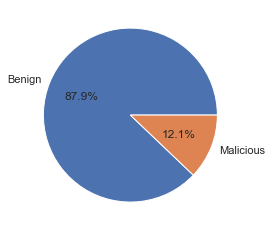

In [6]:
total_count = dst.shape[0]
print(f'Total websites count: {total_count}')
malicious_count = dst['Type'].sum()
print(f'Malicious websites count: {malicious_count}')
benign_count = total_count - dst['Type'].sum()
print(f'Benign websites count: {benign_count}')

plt.pie((benign_count, malicious_count), labels=('Benign', 'Malicious'), autopct='%1.1f%%')
plt.show()

In [7]:
# Drop 'URL' feature
dst.drop('URL', axis=1, inplace=True)

# Get categorical features
categorical_features = list(dst.columns[dst.dtypes == object].values)
print(f'Categorical features: {categorical_features}')

# Get continuous features
continuous_features = list(dst.columns[dst.dtypes != object].values[:-1])
print(f'Continuous features: {continuous_features}')

# Year extraction from date
dst['WHOIS_REGDATE'] = dst['WHOIS_REGDATE'].str.split('/').str[2].str[:4]
dst['WHOIS_UPDATED_DATE'] = dst['WHOIS_UPDATED_DATE'].str.split('/').str[2].str[:4]

Categorical features: ['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
Continuous features: ['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES']


In [13]:
# Calculate malicious/total ratios for categorical features

def calculate_ratios(dst, labels, target):
    ratios = {}
    for i in range(len(labels)):
        name = labels[i]
        ratio = (dst.groupby(name).sum()[target] + 0.05) / (dst.groupby(name).count()[target] + 1)
        ratios[name] = ratio
    return ratios    

categorical_ratios = calculate_ratios(dst, categorical_features, 'Type')
nonzero_categorical_ratios = {}
for name in categorical_ratios.keys():
    ratio = categorical_ratios[name]
    nonzero_categorical_ratios[name] = ratio[ratio != 0]

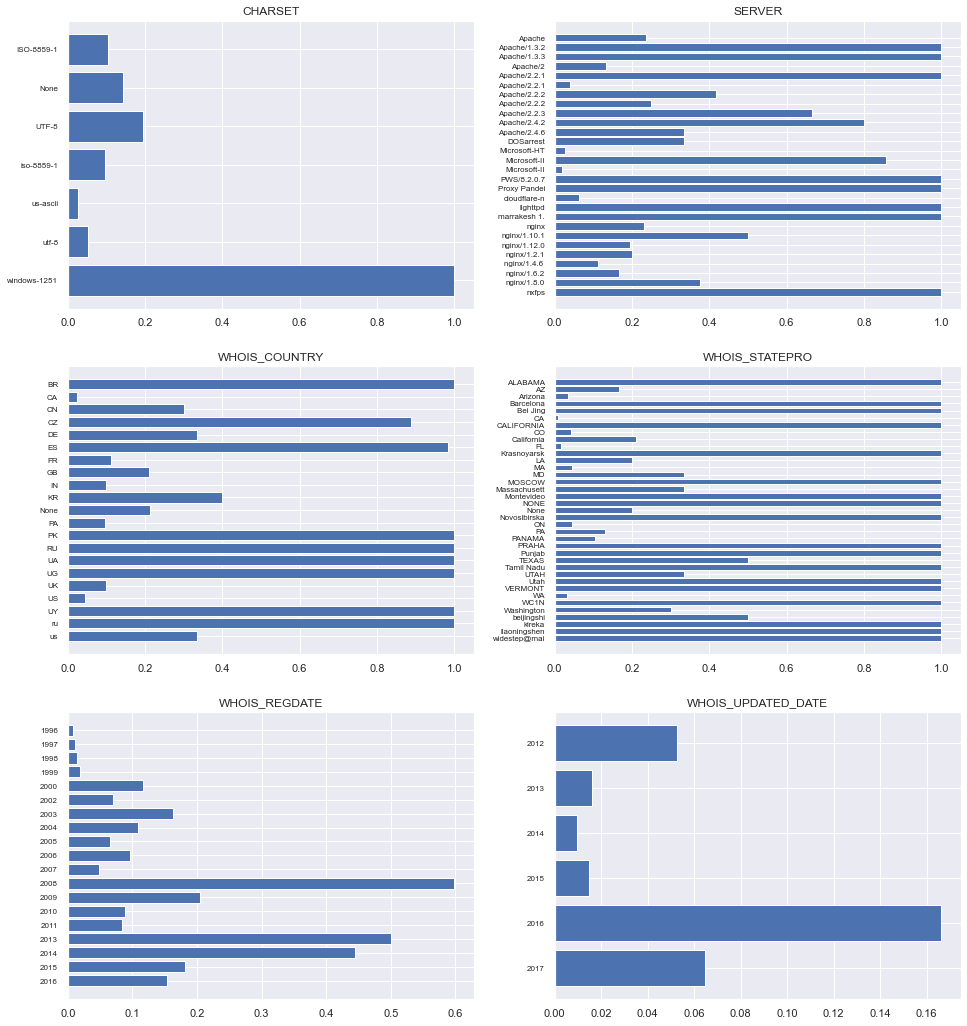

In [8]:
# Plot malicious/total ratios for categorical features

def plot_values(values):
    N = int(np.ceil(len(values) / 2))
    fig, axes = plt.subplots(nrows=N, ncols=2, figsize=(16, 6 * N))
    for i, name in enumerate(values.keys()):
        value = values[name]
        ind = value.index.str[:12]
        axes[i // 2, i % 2].barh(range(len(ind)), value, align="center") 
        axes[i // 2, i % 2].set_title(name)
        axes[i // 2, i % 2].set_yticks(range(len(ind)))
        axes[i // 2, i % 2].set_yticklabels(ind, fontsize=8)
        axes[i // 2, i % 2].invert_yaxis()
    plt.show()
    
plot_values(nonzero_categorical_ratios)

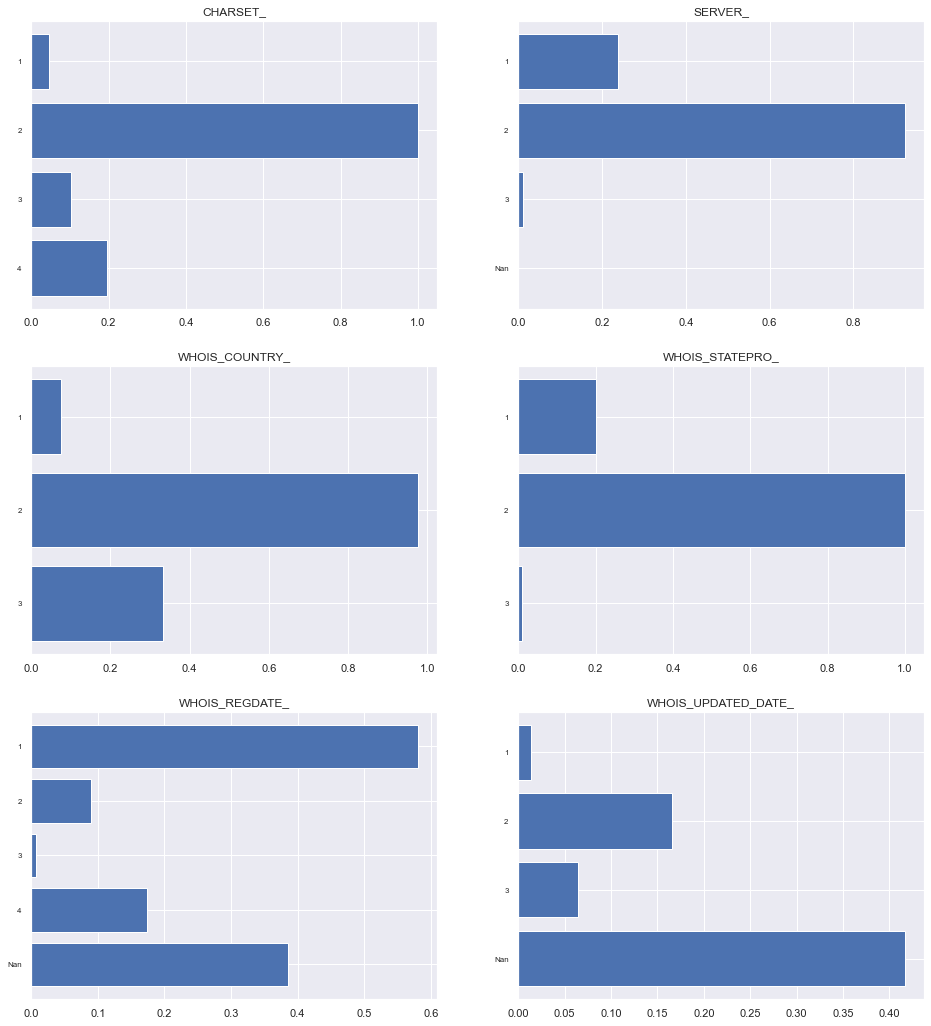

In [9]:
# Transform categorical features

def get_transform(data, n_clusters=3):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clustering.fit(data.values.reshape(-1, 1))
    transform = {key: str(value) for key, value in zip(data.index, clustering.labels_ + 1)}
    return transform

dst['CHARSET_'] = dst['CHARSET'].map(get_transform(categorical_ratios['CHARSET'], 4)).fillna('Nan')
dst['SERVER_'] = dst['SERVER'].map(get_transform(categorical_ratios['SERVER'], 3)).fillna('Nan')
dst['WHOIS_COUNTRY_'] = dst['WHOIS_COUNTRY'].map(get_transform(categorical_ratios['WHOIS_COUNTRY'], 3)).fillna('Nan')
dst['WHOIS_STATEPRO_'] = dst['WHOIS_STATEPRO'].map(get_transform(categorical_ratios['WHOIS_STATEPRO'], 3)).fillna('Nan')
dst['WHOIS_REGDATE_'] = dst['WHOIS_REGDATE'].map(get_transform(categorical_ratios['WHOIS_REGDATE'], 4)).fillna('Nan')
dst['WHOIS_UPDATED_DATE_'] = dst['WHOIS_UPDATED_DATE'].map(get_transform(categorical_ratios['WHOIS_UPDATED_DATE'], 3)).fillna('Nan')

# Calculate and plot malicious/total ratios for transformed categorical features
transformed_categorical_features = np.array([l + '_' for l in categorical_features])
transformed_categorical_ratios = calculate_ratios(dst, transformed_categorical_features, 'Type')
plot_values(transformed_categorical_ratios)

In [10]:
# One-hot encoding for transformed categorical features
encoded = pd.DataFrame()
for label in transformed_categorical_features:
    encoded = pd.concat((encoded, pd.get_dummies(dst[label], prefix=label)), axis=1)
encoded_categorical_features = list(encoded.columns.values)
    
# Add encoded and drop old features
dst.drop(categorical_features, axis=1, inplace=True)
dst.drop(transformed_categorical_features, axis=1, inplace=True)
dst = pd.concat((dst, encoded), axis=1)

# Standardize continuous features
continuous_means = dst[continuous_features].mean()
continuous_stds = dst[continuous_features].std()
dst[continuous_features] = (dst[continuous_features] - continuous_means) / continuous_stds

# Impute missing values 
imputer = KNNImputer(n_neighbors=5)
values_filled = imputer.fit_transform(dst)
dst = pd.DataFrame(values_filled, columns=dst.columns)

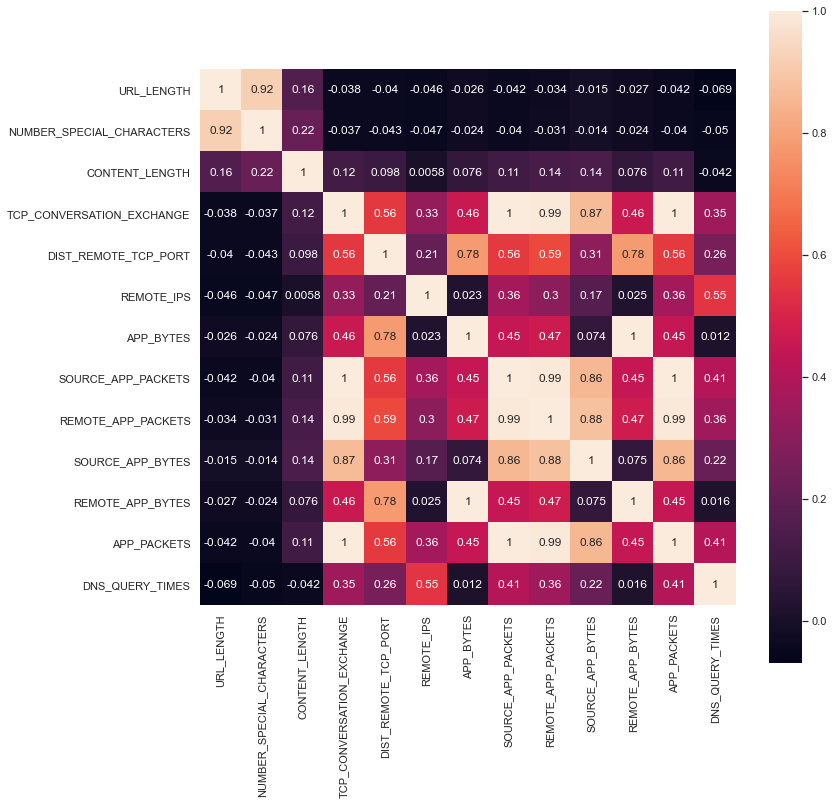

In [11]:
# Plot correlation between continuous features
plt.figure(figsize=(12, 12))
_ = sns.heatmap(dst[continuous_features].corr(), annot=True, square=True)

In [12]:
# Drop correlated continuous features
continuous_features.remove('REMOTE_APP_PACKETS')
continuous_features.remove('SOURCE_APP_PACKETS')
continuous_features.remove('APP_BYTES')
continuous_features.remove('TCP_CONVERSATION_EXCHANGE')
dst.drop(['REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE', 'APP_BYTES'], axis=1, inplace=True)

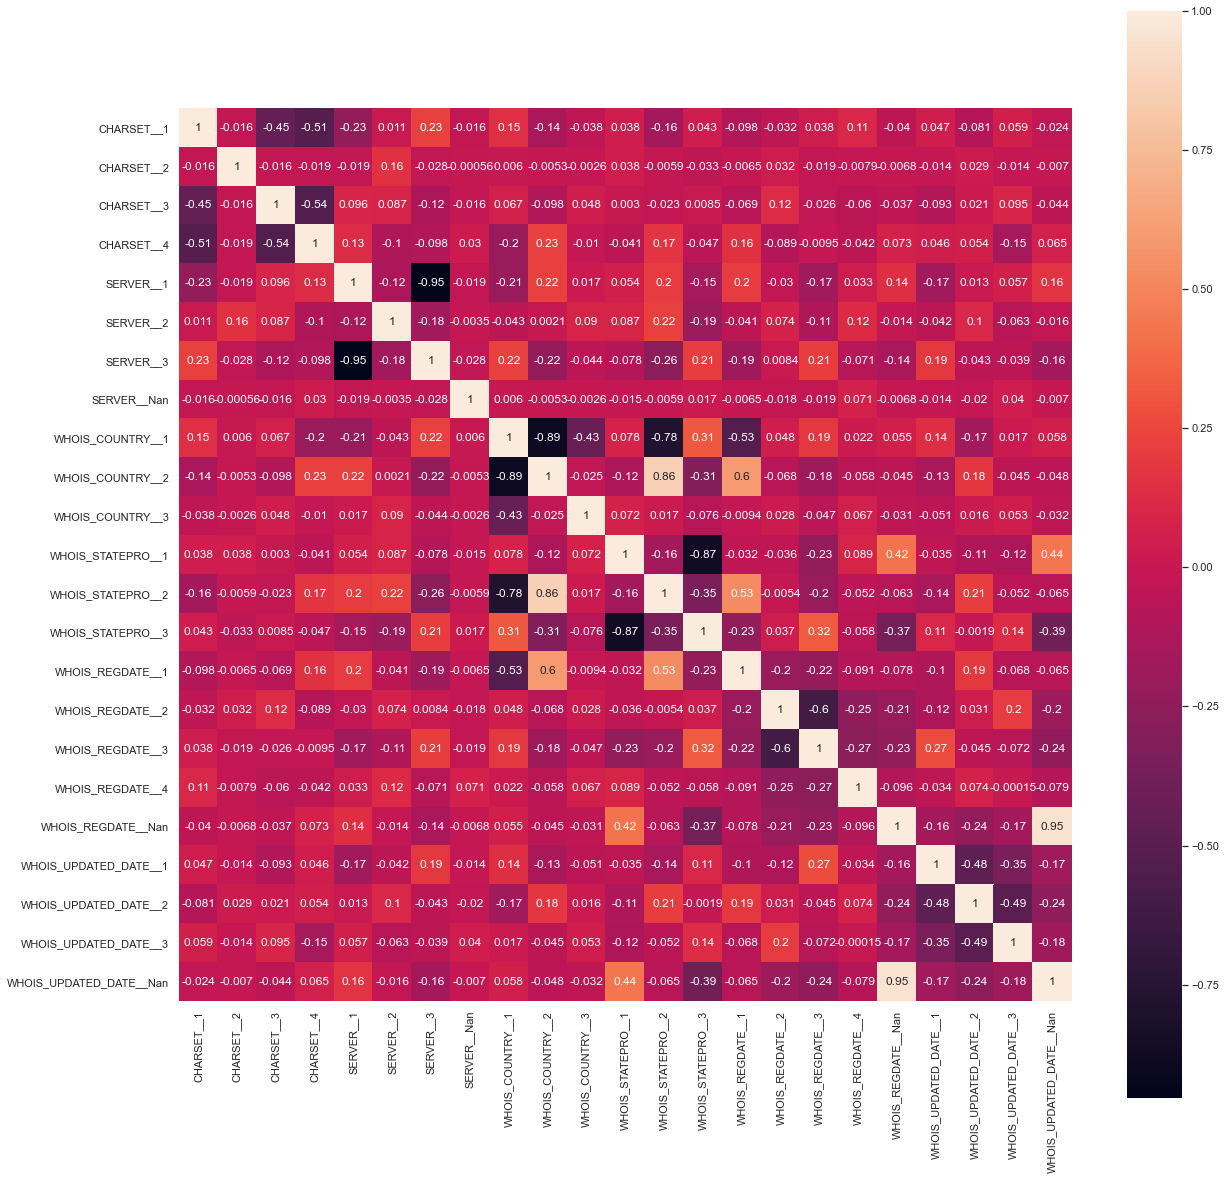

In [13]:
# Plot correlation between categorical features
plt.figure(figsize=(20, 20))
_ = sns.heatmap(dst[encoded_categorical_features].corr(), annot=True, square=True)

In [14]:
# Drop correlated categorical features
encoded_categorical_features.remove('SERVER__3')
encoded_categorical_features.remove('WHOIS_COUNTRY__2')
encoded_categorical_features.remove('WHOIS_REGDATE__Nan')
dst.drop(['SERVER__3', 'WHOIS_COUNTRY__2', 'WHOIS_REGDATE__Nan'], axis=1, inplace=True)

In [15]:
dst.describe()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
count  1781.000000                1781.000000     1781.000000   
mean      0.000000                   0.000000       -0.013373   
std       1.000000                   1.000000        0.780881   
min      -1.486496                  -1.343269       -0.322241   
25%      -0.651819                  -0.683913       -0.302747   
50%      -0.288916                  -0.244343       -0.181358   
75%       0.400599                   0.415013        0.020633   
max       6.969140                   7.008570       17.518669   

       DIST_REMOTE_TCP_PORT    REMOTE_IPS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  \
count          1.781000e+03  1.781000e+03      1.781000e+03      1.781000e+03   
mean           3.191657e-17  5.186443e-17      2.992179e-18      3.989572e-18   
std            1.000000e+00  1.000000e+00      1.000000e+00      1.000000e+00   
min           -2.509601e-01 -9.036500e-01     -2.274851e-01     -5.629591e-02   
25%           -2.509601e-01 -9.036500e-01     -2.274851e-01     -5.629591e-02   
50%           -2.509601e-01 -3.131526e-01     -2.191973e-01     -4.318350e-02   
75%           -2.167932e-02  5.725935e-01     -8.712250e-02     -8.110043e-03   
max            3.221519e+01  4.115578e+00      2.925942e+01      4.209797e+01   

        APP_PACKETS  DNS_QUERY_TIMES         Type  ...  WHOIS_STATEPRO__2  \
count  1.781000e+03      1781.000000  1781.000000  ...        1781.000000   
mean   1.994786e-17        -0.000434     0.121280  ...           0.058956   
std    1.000000e+00         0.999887     0.326544  ...           0.235608   
min   -4.453857e-01        -0.772295     0.000000  ...           0.000000   
25%   -4.453857e-01        -0.772295     0.000000  ...           0.000000   
50%   -2.532035e-01        -0.772295     0.000000  ...           0.000000   
75%    1.792064e-01         0.592495     0.000000  ...           0.000000   
max    2.833389e+01         6.051658     1.000000  ...           1.000000   

       WHOIS_STATEPRO__3  WHOIS_REGDATE__1  WHOIS_REGDATE__2  \
count        1781.000000       1781.000000       1781.000000   
mean            0.663111          0.069624          0.353172   
std             0.472779          0.254583          0.478090   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.000000          0.000000   
50%             1.000000          0.000000          0.000000   
75%             1.000000          0.000000          1.000000   
max             1.000000          1.000000          1.000000   

       WHOIS_REGDATE__3  WHOIS_REGDATE__4  WHOIS_UPDATED_DATE__1  \
count       1781.000000       1781.000000            1781.000000   
mean           0.400898          0.100505               0.250983   
std            0.490218          0.300757               0.433700   
min            0.000000          0.000000               0.000000   
25%            0.000000          0.000000               0.000000   
50%            0.000000          0.000000               0.000000   
75%            1.000000          0.000000               1.000000   
max            1.000000          1.000000               1.000000   

       WHOIS_UPDATED_DATE__2  WHOIS_UPDATED_DATE__3  WHOIS_UPDATED_DATE__Nan  
count            1781.000000            1781.000000              1781.000000  
mean                0.405390               0.262774                 0.080853  
std                 0.491105               0.440264                 0.272686  
min                 0.000000               0.000000                 0.000000  
25%                 0.000000               0.000000                 0.000000  
50%                 0.000000               0.000000                 0.000000  
75%                 1.000000               1.000000                 0.000000  
max                 1.000000               1.000000                 1.000000  

[8 rows x 30 columns]

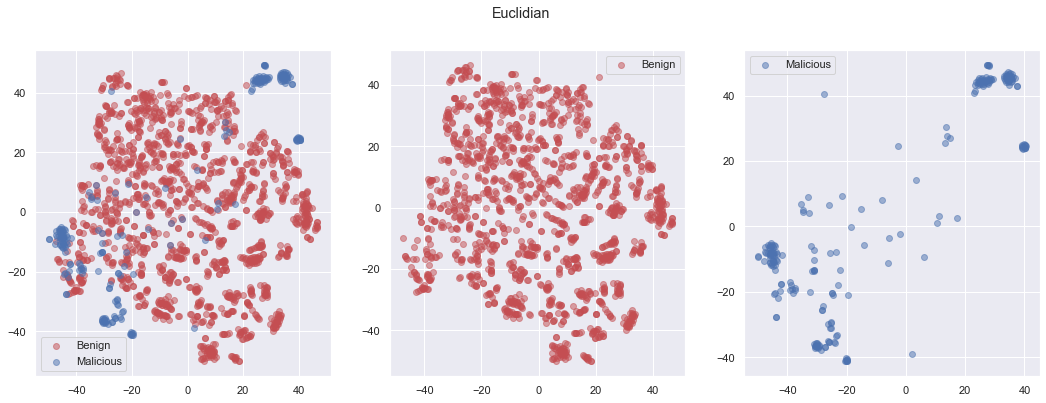

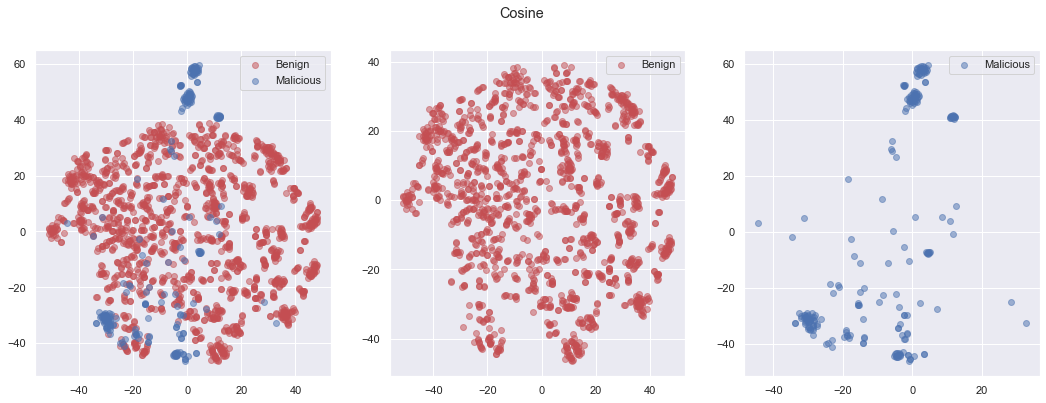

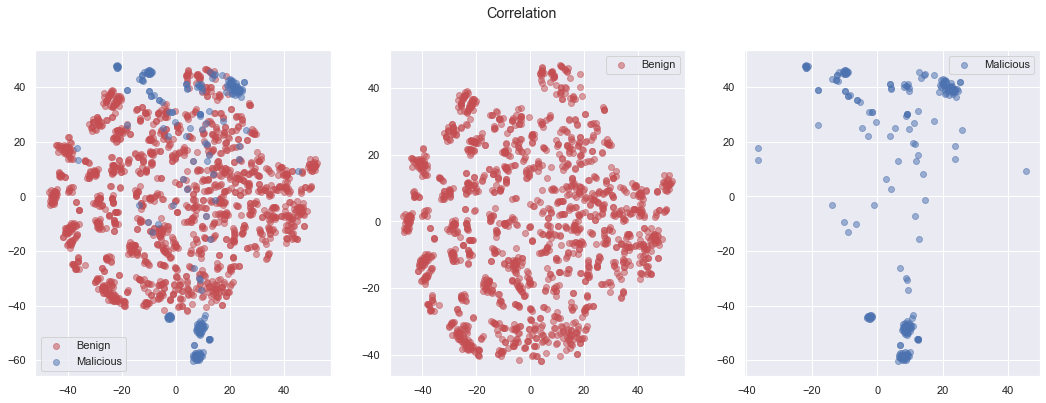

In [16]:
# Represent data in 2d

def plot_representation(representation, target, title):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    axes[0].scatter(representation[target==0, 0], 
                    representation[target==0, 1], color='r', alpha=0.5, label='Benign')
    axes[0].scatter(representation[target==1, 0], 
                    representation[target==1, 1], color='b', alpha=0.5, label='Malicious')
    axes[0].legend()
    axes[1].scatter(representation[target==0, 0], 
                    representation[target==0, 1], color='r', alpha=0.5, label='Benign')
    axes[1].legend()
    axes[2].scatter(representation[target==1, 0], 
                    representation[target==1, 1], color='b', alpha=0.5, label='Malicious')
    axes[2].legend()
    fig.suptitle(title)
    plt.show()
    
# Get t-SNE representations
tsne_euclidian = TSNE().fit_transform(dst.drop('Type', axis=1))
tsne_cosine = TSNE(metric='cosine').fit_transform(dst.drop('Type', axis=1))
tsne_correlation = TSNE(metric='correlation').fit_transform(dst.drop('Type', axis=1))

# Plot representations
plot_representation(tsne_euclidian, dst.Type.values, 'Euclidian')
plot_representation(tsne_cosine, dst.Type.values, 'Cosine')
plot_representation(tsne_correlation, dst.Type.values, 'Correlation')

# Building a model

In [17]:
# Data splitting

X = dst.drop('Type', axis=1)
y = dst['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [18]:
# Function for model evaluation

def evaluate(clf, X, y):
    y_pred = clf.predict(X)
    
    print(f'Model params: {clf.get_params()}\n')
    confusion_matrix_ = confusion_matrix(y_pred, y)
    print(f'Confusion matrix:\n{confusion_matrix_}')
    accuracy_score_ = accuracy_score(y_pred, y)
    print(f'Accuracy: {accuracy_score_}')
    print(f'True positive count: {confusion_matrix_[1, 1]}')
    print(f'True negative count: {confusion_matrix_[0, 0]}')
    print(f'False positive count: {confusion_matrix_[1, 0]}')
    print(f'False negative count: {confusion_matrix_[0, 1]}')

    precision = confusion_matrix_[1, 1] / (confusion_matrix_[1, 1] + confusion_matrix_[1, 0])
    print(f'Precision: {precision}')
    recall = confusion_matrix_[1, 1] / (confusion_matrix_[1, 1] + confusion_matrix_[0, 1])
    print(f'Recall: {recall}')
    f1_score = 2 * precision * recall / (precision + recall)
    print(f'F1 score: {f1_score}')
    auc = roc_auc_score(y, y_pred)
    print(f'AUC: {auc}')
    
    fpr, tpr, _ = roc_curve(y, y_pred)
    precision_, recall_, _ = precision_recall_curve(y, y_pred)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    axes[0].plot(fpr, tpr, linestyle='--')
    axes[0].set_xlabel('False Positive Rate', fontsize=16)
    axes[0].set_ylabel('True Positive Rate', fontsize=16)
    axes[1].plot(recall_, precision_, linestyle='--')
    axes[1].set_xlabel('Recall', fontsize=16)
    axes[1].set_ylabel('Precision', fontsize=16)
    plt.show()

Training data:

Model params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

Confusion matrix:
[[1182    0]
 [   0  153]]
Accuracy: 1.0
True positive count: 153
True negative count: 1182
False positive count: 0
False negative count: 0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
AUC: 1.0


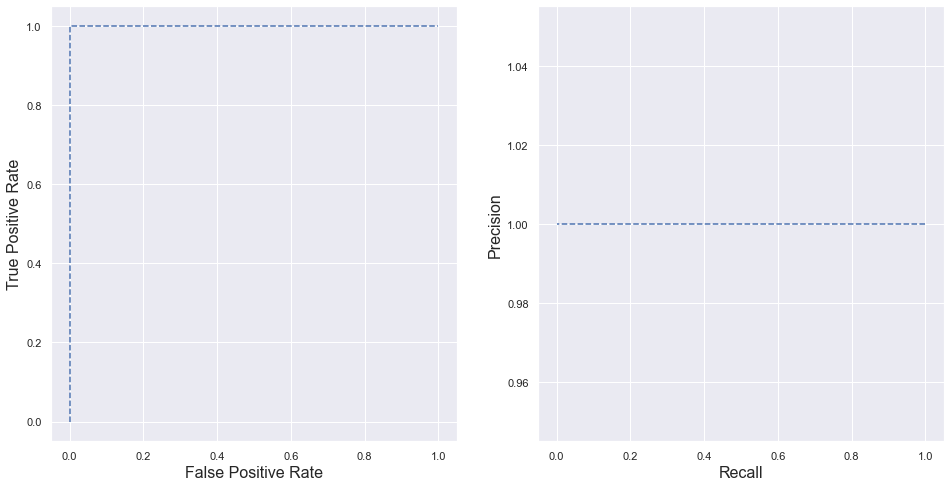

Testing data:

Model params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

Confusion matrix:
[[375  11]
 [  8  52]]
Accuracy: 0.9573991031390134
True positive count: 52
True negative count: 375
False positive count: 8
False negative count: 11
Precision: 0.8666666666666667
Recall: 0.8253968253968254
F1 score: 0.8455284552845528
AUC: 0.9022545484686476


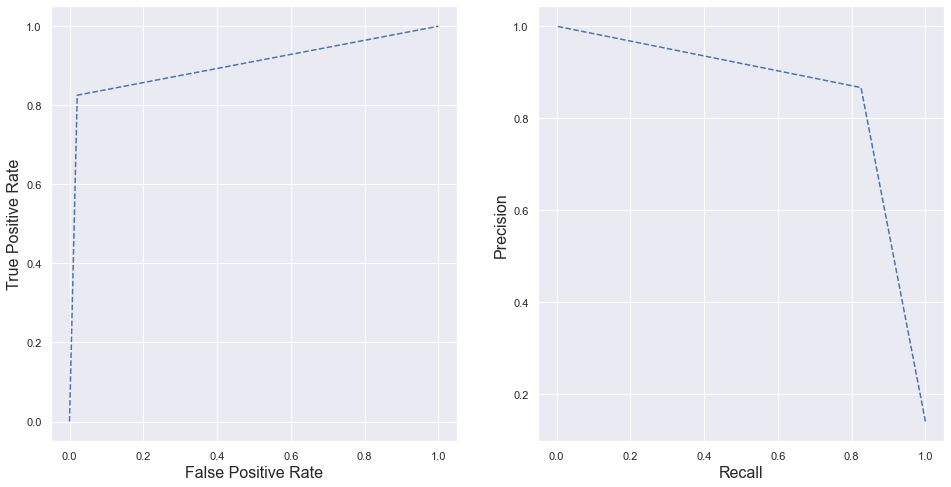

In [19]:
# DecisionTreeClassifier with default params
tree_clf_default = DecisionTreeClassifier()
tree_clf_default.fit(X_train, y_train)

# Model evaluation
print('Training data:\n')
evaluate(tree_clf_default, X_train, y_train)
print('Testing data:\n')
evaluate(tree_clf_default, X_test, y_test)

# DecisionTree representation
viz = dtreeviz(tree_clf_default, X, y,
                target_name="target",
                feature_names=X.columns,
                class_names=['Benign', 'Malicious'])
viz.save("tree_clf_default.svg")

Tuned model params
Model params: {'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 5}

AUC score on cross-validation: 0.9662244668833662
Training data:

Model params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

Confusion matrix:
[[1168   24]
 [  14  129]]
Accuracy: 0.9715355805243445
True positive count: 129
True negative count: 1168
False positive count: 14
False negative count: 24
Precision: 0.9020979020979021
Recall: 0.8431372549019608
F1 score: 0.8716216216216216
AUC: 0.9156464616303375


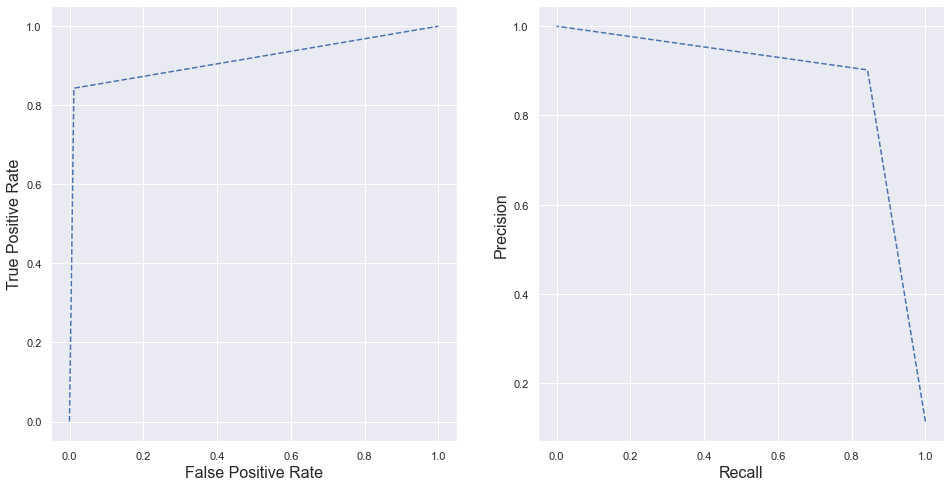

Testing data:

Model params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

Confusion matrix:
[[378  14]
 [  5  49]]
Accuracy: 0.9573991031390134
True positive count: 49
True negative count: 378
False positive count: 5
False negative count: 14
Precision: 0.9074074074074074
Recall: 0.7777777777777778
F1 score: 0.8376068376068377
AUC: 0.8823614737452857


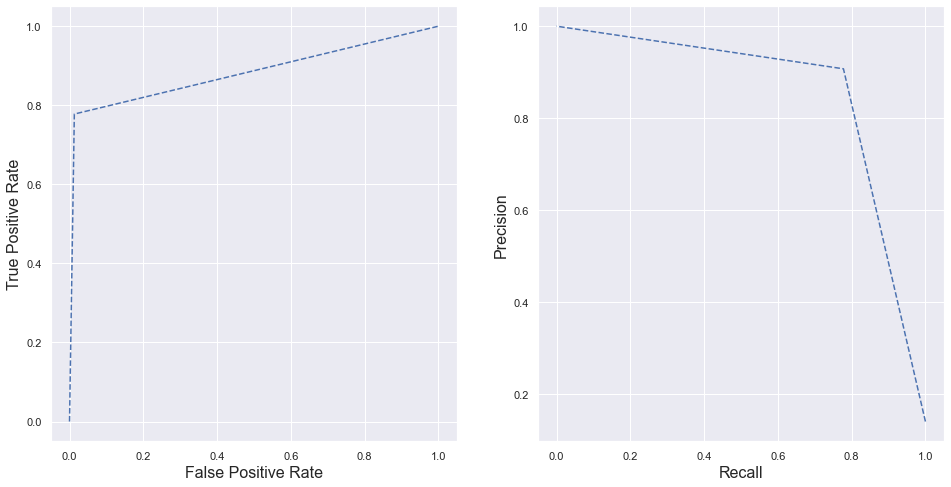

In [20]:
# Tuning hyperparameters with GridSearch
param_grid = {'max_depth': np.arange(3, 14, 2),
              'min_samples_split': (2, 3, 4, 5),
              'min_samples_leaf': (1, 2, 3, 4, 5),
              'max_leaf_nodes': (None, 5, 10, 15),
              'max_features': (None, 'sqrt', 'log2')}
tree_clf_cv = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring='roc_auc', n_jobs=-1)
tree_clf_cv.fit(X_train, y_train)
tree_clf_tuned = tree_clf_cv.best_estimator_
cv_params = tree_clf_cv.best_params_
cv_score = tree_clf_cv.best_score_

# Tuned model evaluation
print('Tuned model params')
print(f'Model params: {cv_params}\n')
print(f'AUC score on cross-validation: {cv_score}')

# Model evaluation
print('Training data:\n')
evaluate(tree_clf_tuned, X_train, y_train)
print('Testing data:\n')
evaluate(tree_clf_tuned, X_test, y_test)

# DecisionTree representation
viz = dtreeviz(tree_clf_tuned, X, y,
                target_name="target",
                feature_names=X.columns,
                class_names=['Benign', 'Malicious'])
viz.save("tree_clf_tuned.svg")

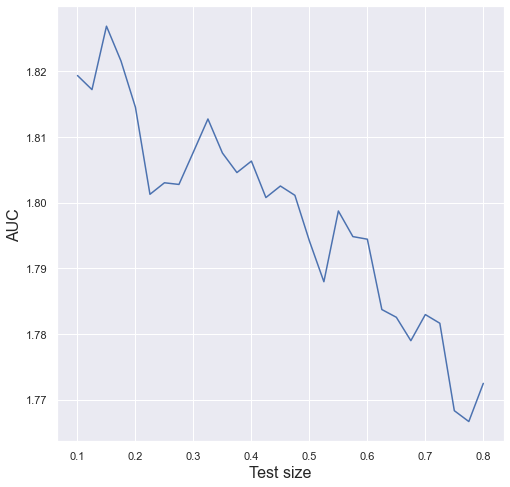

In [21]:
# AUC_score/test_size relation
sizes = np.linspace(0.1, 0.8, 29)
scores = []
for s in sizes:
    score = 0
    for _ in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=s)
        tree_clf = DecisionTreeClassifier()
        tree_clf.fit(X_train, y_train)
        y_pred = tree_clf.predict(X_test)
        score += roc_auc_score(y_test, y_pred)
    scores.append(score / 25)

plt.figure(figsize=(8,8))
plt.plot(sizes, scores)
plt.xlabel('Test size', fontsize=16)
plt.ylabel('AUC', fontsize=16)
plt.show()